**Assumptions**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assume ideal flow, non-Newtonian, non-compressible
# Viscosity estimated from "Influence of surfactant structure on polydisperse formulations of alkyl ether sulfates and alkyl amidopropyl betaines"

**Parameters**

In [2]:
flow_rate = 40e-6 / 3600  # Flow rate 40ml/hr in m^3/s
mu = 0.2  # Dynamic viscosity (Pa·s)
diameter = 0.8e-3  # Diameter for circular channel is 800um in (m)
side_length = 0.8e-3  # Side length for square channel (m)

**Circular channel shear stress**

In [3]:
radius_circular = diameter / 2
area_circular = np.pi * (radius_circular ** 2)
u_avg_circular = flow_rate / area_circular
u_max_circular = 2 * u_avg_circular

r_circular = np.linspace(0, radius_circular, 100)
u_circular = u_max_circular * (1 - (r_circular / radius_circular) ** 2)
tau_circular = -mu * (2 * u_max_circular * r_circular / (radius_circular ** 2))

**Square channel shear stress**

In [4]:
area_square = side_length ** 2
u_avg_square = flow_rate / area_square
u_max_square = 1.5 * u_avg_square  #approximation

r_square = np.linspace(0, side_length / 2, 100)
u_square = u_max_square * (1 - (r_square / (side_length / 2)) ** 2)
tau_square = -mu * (2 * u_max_square * r_square / ((side_length / 2) ** 2))

**Plotting**

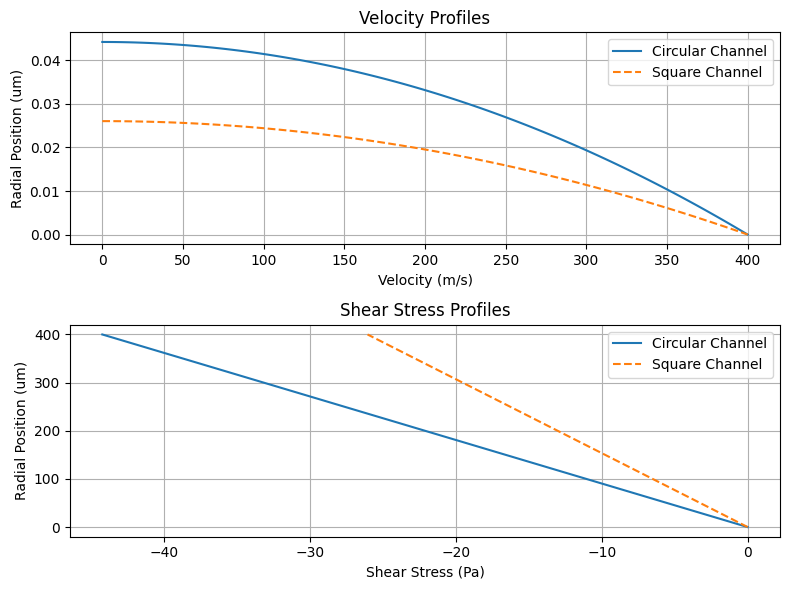

In [19]:
plt.figure(figsize=(8, 6))

# Velocity profiles
plt.subplot(2, 1, 1) 
plt.plot(r_circular * 1e6, u_circular, label='Circular Channel')
plt.plot(r_square * 1e6, u_square, label='Square Channel', linestyle='--')
plt.title('Velocity Profiles')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Radial Position (um)')
plt.legend(bbox_to_anchor=(1,1))
plt.grid()

# Shear stress profiles
plt.subplot(2, 1, 2)
plt.plot(tau_circular,r_circular * 1e6, label='Circular Channel')
plt.plot(tau_square, r_square * 1e6, label='Square Channel', linestyle='--')
plt.title('Shear Stress Profiles')
plt.xlabel('Shear Stress (Pa)')
plt.ylabel('Radial Position (um)')
plt.legend(bbox_to_anchor=(1,1))
plt.grid()

plt.tight_layout()
plt.show()